# PL 4- Classification with Cross Validation

In this class, we will explore the resampling techniques covered in the theoretical class of this week.

We will use the MNIST dataset, and develop models studied so far.
https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

**Get the dataset**



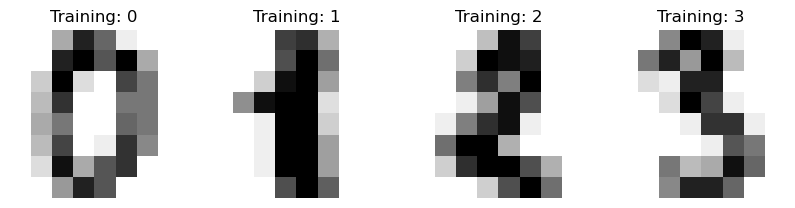

In [2]:
digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [5]:
#Separate into label and features

x, y = load_digits(return_X_y=True)

In [4]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [9]:
# Validation set approach
regr = LogisticRegression()
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(x.reshape(-1,1))
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y.ravel(),
                                                        test_size=t_prop, random_state=Y[i,j])
                                                                        
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

TypeError: 'tuple' object is not callable

## Class objectives:

Implement the various cross validation approaches studied in the theoretical class:

1.   The validation set approach
2.   LOOCV - Leave one out cross validation
3.   K-fold Cross Validation
4.   Cross Validation Stratified


To test the various approaches you can use the Logistic Regression Model.


You must evaluate the resampling methods tested, justifying the results obtained, specifying the advantages and disadvantages of each other.

In the case of K-fold cross validation, several values of K must be tested and check how this parameter influences the results.

After applying Logistic Regression, you can apply LDA and check if your conclusions hold.